## 23.01.02 identical oscillator 시각화.ipynb

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm import tqdm
import parmap
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.gen_Distribution import *
from TO_sim.For_ensemble.for_221220 import get_tr2
from TO_sim.Utility import Create_Folder
import re
DF = 'Review/23.01.02 identical oscillator 시각화/'
Create_Folder(DF)

In [114]:
ts,rs = {},{}

In [166]:
m = 6
K = 1
seed = 0
N = 500
dt = 0.01
initial_frequecny = 0
dtheta_dist = 'Normal\n(Deterministic)'
# dtheta_dist = 'Normal'
init_dist = Identical(N, 0, seed=seed)
theta_init, omega_init, Kc = init_dist
resub = re.sub("\n","",dtheta_dist)
dists = {'Lorentzian\n(Deterministic)':Quantile_Lorentzian,'Normal\n(Deterministic)':Quantile_Normal,
        'Lorentzian':Lorentzian,'Normal':Normal,'Identical':Identical}
_,dtheta_init,_ = dists[dtheta_dist](N,0,1,seed=seed+3)
np.sort(dtheta_init)

ts[m],rs[m],(theta_s,dtheta_s,omega) = get_tr2(m,K=K,init_dist=init_dist,dtheta_init=dtheta_init,dt =dt,t_end=100)

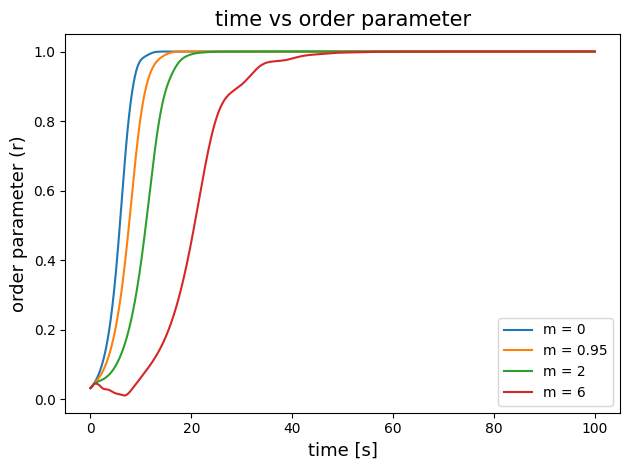

In [134]:
ms = [0,0.95,2,6]
plt.figure(facecolor ='white')
for m in ms:
    plt.plot(ts[m],rs[m],label=f'm = {m}')
plt.legend()
plt.xlabel('time [s]',fontsize=13)
plt.ylabel('order parameter (r)',fontsize=13)
plt.title('time vs order parameter',fontsize=15)
plt.tight_layout()
plt.savefig(DF+f't vs r m ={ms}.png',dpi=400)

In [130]:
np.max(theta_s),np.min(theta_s)

(17.986259599614183, -15.875975659086945)

In [164]:
if m == 0:
    dtheta_s = np.diff(theta_s/dt,axis=0)
    dtheta_s = np.pad(dtheta_s,((0,1),(0,0)),'edge')

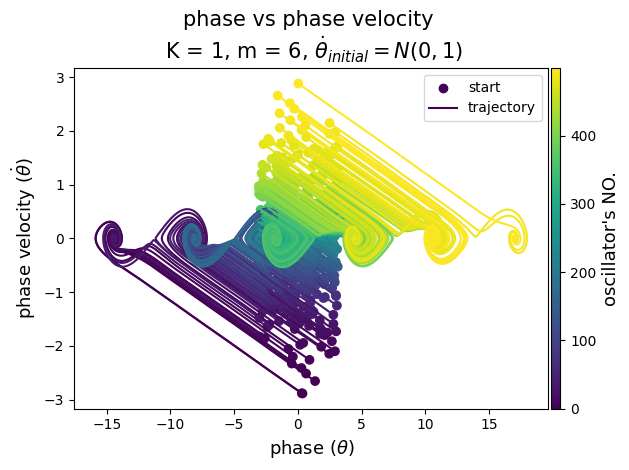

In [167]:
sorted_idx = np.argsort(dtheta_init)
color_ = np.linspace(0,1,len(dtheta_init))
color = plt.cm.viridis(color_)
fig = plt.figure(facecolor='white')
# plt.scatter(0*dtheta_init,0*dtheta_init,c=np.arange(len(color_)),s=0)
sca = plt.scatter(theta_s[0,:],dtheta_s[0,:],c=np.arange(len(color_)))
ax = plt.gca()
plt.scatter(theta_s[0,0],dtheta_s[0,0],color=color[0],label ='start')
plt.plot(theta_s[:,0],dtheta_s[:,0],color=color[0],label ='trajectory')

for i in sorted_idx:
    plt.plot(theta_s[:,i],dtheta_s[:,i],color=color[i]);
# plt.scatter(theta_s[:,10],dtheta_s[:,10],c=t)
plt.xlabel(r'phase ($\theta$)',fontsize=13)
plt.ylabel(r'phase velocity ($\dot{\theta}$)',fontsize=13)
plt.title(f'phase vs phase velocity \n K = {K}, m = {m}, '+r'$\dot{\theta}_{initial}=N(0,1)$',fontsize=15)
plt.legend()
divider3 = make_axes_locatable(ax)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar =plt.colorbar(sca, cax=cax)
cbar.set_label('oscillator\'s NO.',fontsize=13)
plt.tight_layout()
plt.savefig(DF+f'phase diagram K = {K} m = {m}, initial_dtheta={resub}.png',dpi =400)

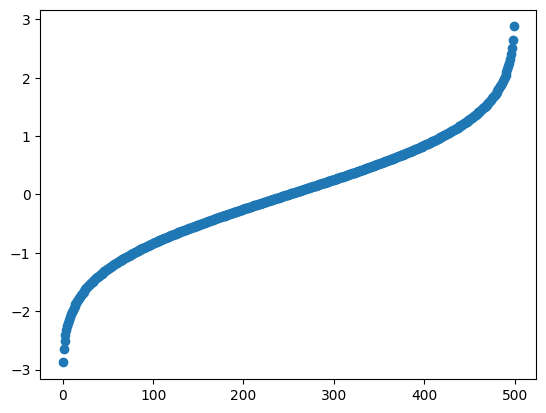

In [49]:
plt.scatter(np.arange(len(dtheta_init)),dtheta_init)

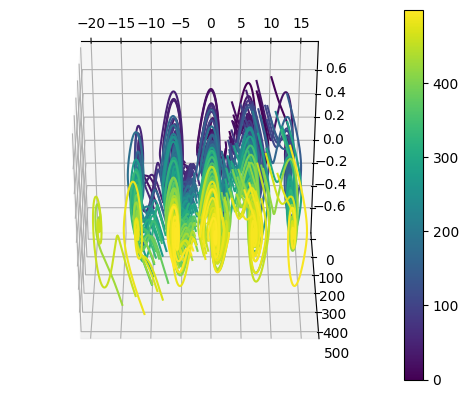

In [63]:
color_ = np.linspace(0,1,len(dtheta_init))
color = plt.cm.viridis(color_)
ax = plt.subplot(projection='3d')
plt.scatter(0*dtheta_init,0*dtheta_init,c=np.arange(len(color_)),s=0)


for i in range(len(dtheta_init)):
    ax.plot(theta_s[800:,i],dtheta_s[800:,i],zs=[i],color=color[i]);
# plt.scatter(theta_s[:,10],dtheta_s[:,10],c=t)
ax.view_init(elev = 125,azim = -90)

plt.colorbar()